In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("dataset3_pd.csv")
datadata = pd.read_csv("dataset3_pdpd.csv")


datadata

,WL1(mm),WL2(mm),WL3(mm),WL4 (mm),WL5 (mm),Solar (W/m2),AirTemp (DegC),RH (%)
0,53,208,87,36,44,0,21.9,97
1,59,62,93,36,50,113,22.3,100
2,60,61,93,36,56,152,22.8,100
3,58,60,91,36,51,141,23.3,100
4,57,61,91,36,48,123,23.6,99
...,...,...,...,...,...,...,...,...
407,39,42,42,36,44,0,14.5,93
408,39,42,42,36,44,0,13.9,99
409,39,42,42,36,44,0,14.4,100
410,39,42,42,36,44,0,14.6,98


In [3]:
x = datadata.values.reshape(-1, 8)
y = data.y.values.reshape(-1, 1).ravel()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, shuffle = False)

In [32]:
SupportVectorRegModel = SVR(kernel='linear', C=100, gamma='auto', epsilon=.0001)
SupportVectorRegModel.fit(x_train, y_train)

SVR(C=100, epsilon=0.0001, gamma='auto', kernel='linear')

In [33]:
y_pred = SupportVectorRegModel.predict(x_test)
y_pred

array([ 5.97858639e-01,  1.37951648e-01,  3.46861501e-03, -6.75493856e-02,
       -1.08345437e-01, -1.05324258e-01,  1.05332523e-01,  5.82771369e+00,
        4.52216836e+00,  4.80708863e+00,  4.74275617e+00,  1.23837119e+00,
        1.65164233e-01, -4.33579800e-02, -3.88262146e-02,  1.45212562e+00,
        3.71365285e+00,  1.05228304e+00,  3.17154960e-02,  4.41708253e-02,
        1.18443623e+00,  4.43879302e+00,  3.31196723e+00,  3.01520169e-01,
        1.79804003e-01,  1.66096115e-02,  1.20778503e-02,  2.60437666e-02,
        1.01307507e+00,  1.88286375e+00,  2.97017974e+00,  3.34094135e+00,
        1.55190444e+00,  1.64776206e-01,  1.22469561e-01,  3.32260928e-02,
        2.71837283e-02,  5.03984843e-02,  2.06854297e-02,  1.16219013e-02,
        8.60073185e-03,  7.09013595e-03,  7.09013595e-03,  1.19633028e+00,
        5.26576451e+00,  3.04940737e+00, -4.25527236e-01, -6.44605220e-01,
       -1.57030070e-01, -1.58540663e-01, -8.78903628e-02, -6.67099743e-02,
       -7.12417294e-02, -

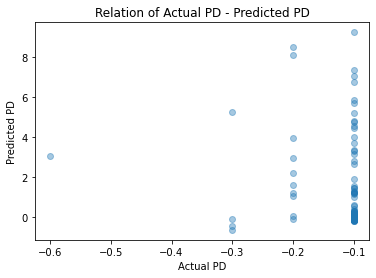

In [34]:
plt.scatter(y_test, y_pred, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Relation of Actual PD - Predicted PD')
plt.show()

In [35]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

2.7203031041538672